# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques
---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

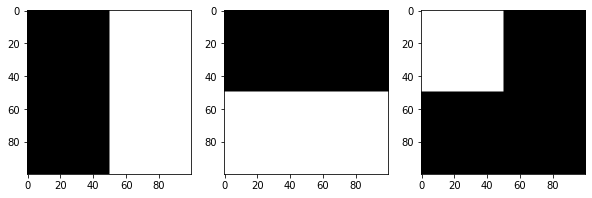

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


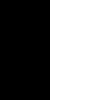

In [11]:
from PIL import Image

def create_vertical_line_image(size=(100, 100)):
    img = Image.new("RGB", size)
    middle = size[0] // 2
    for y in range(size[1]):
        for x in range(size[0]):
            if x < middle:
                img.putpixel((x, y), (0, 0, 0))  # Left side black
            else:
                img.putpixel((x, y), (255, 255, 255))  # Right side white
    return img

vertical_line_image = create_vertical_line_image()
vertical_line_image
 

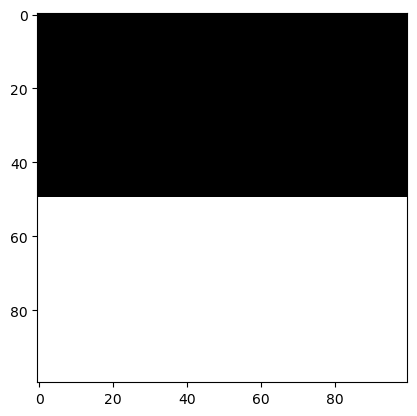

In [13]:

def create_half_black_half_white_image(size=(100, 100)):
    image = np.zeros((size[1], size[0], 3), dtype=np.uint8)
    middle = size[1] // 2
    image[middle:, :] = [255, 255, 255] 
    return image

half_black_half_white_image = create_half_black_half_white_image()

plt.imshow(half_black_half_white_image)
plt.show()



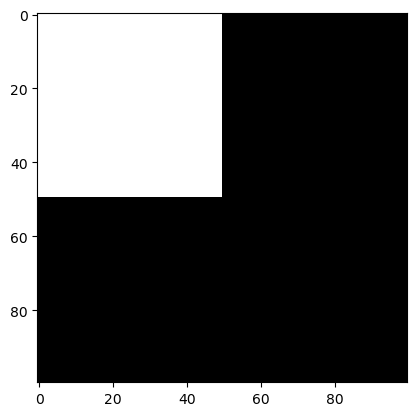

In [14]:
def create_top_left_white_image(size=(100, 100)):
    image = np.zeros((size[1], size[0], 3), dtype=np.uint8)
    half_size = size[0] // 2
    image[:half_size, :half_size] = [255, 255, 255]  # Set the top left quarter to white
    return image

top_left_white_image = create_top_left_white_image()

plt.imshow(top_left_white_image)
plt.show()


*   Use the above three images to create the following image

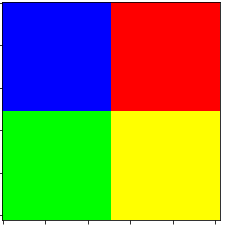
*Hint: Remember channels and color spaces*

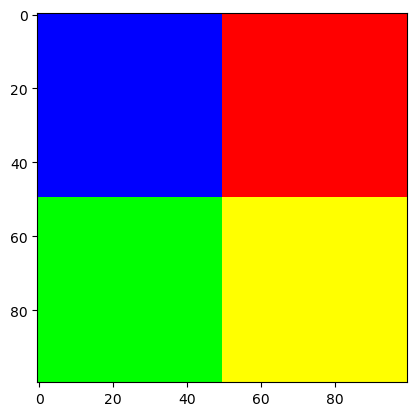

In [15]:
def create_quadrant_image(size=(100, 100)):
    image = np.zeros((size[1], size[0], 3), dtype=np.uint8)
    half_size = size[0] // 2
    image[:half_size, :half_size] = [0, 0, 255]
    image[:half_size, half_size:] = [255, 0, 0]
    image[half_size:, :half_size] = [0, 255, 0]
    image[half_size:, half_size:] = [255, 255, 0]
    return image

quadrant_image = create_quadrant_image()

plt.imshow(quadrant_image)
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

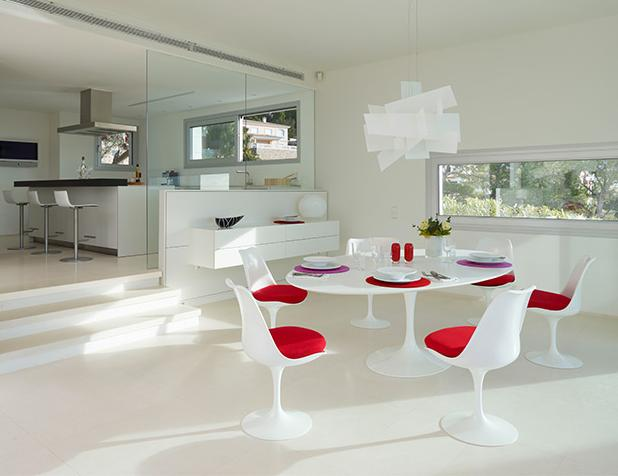

*   Extract individual channels and plot them using matplotlib subplot.



In [18]:
image = io.imread('images/sillas.jpg')
image


array([[[196, 202, 192],
        [190, 196, 186],
        [175, 181, 171],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       [[184, 190, 180],
        [193, 199, 189],
        [202, 208, 198],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       [[204, 207, 198],
        [199, 202, 193],
        [193, 196, 187],
        ...,
        [170, 174, 159],
        [169, 173, 158],
        [169, 173, 158]],

       ...,

       [[204, 199, 193],
        [204, 199, 193],
        [204, 199, 193],
        ...,
        [181, 182, 176],
        [182, 183, 177],
        [182, 183, 177]],

       [[204, 199, 193],
        [204, 199, 193],
        [204, 199, 193],
        ...,
        [182, 183, 177],
        [181, 182, 176],
        [181, 182, 176]],

       [[205, 200, 194],
        [205, 200, 194],
        [205, 200, 194],
        ...,
        [187, 188, 182],
        [184, 185, 179],
        [184, 185, 179]]

In [19]:
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]


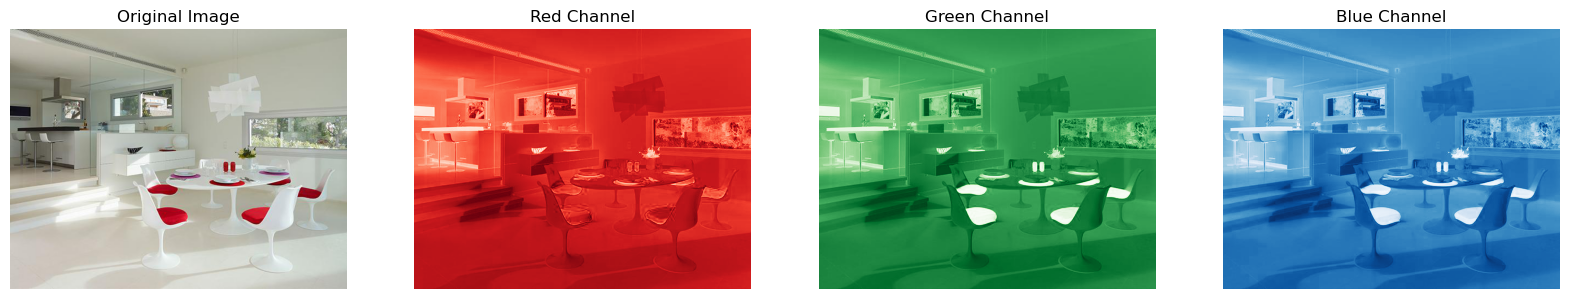

In [20]:
# Create a figure and axis
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot the original image
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Plot the red channel
axs[1].imshow(red_channel, cmap='Reds')
axs[1].set_title('Red Channel')
axs[1].axis('off')

# Plot the green channel
axs[2].imshow(green_channel, cmap='Greens')
axs[2].set_title('Green Channel')
axs[2].axis('off')

# Plot the blue channel
axs[3].imshow(blue_channel, cmap='Blues')
axs[3].set_title('Blue Channel')
axs[3].axis('off')

# Display the plot
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

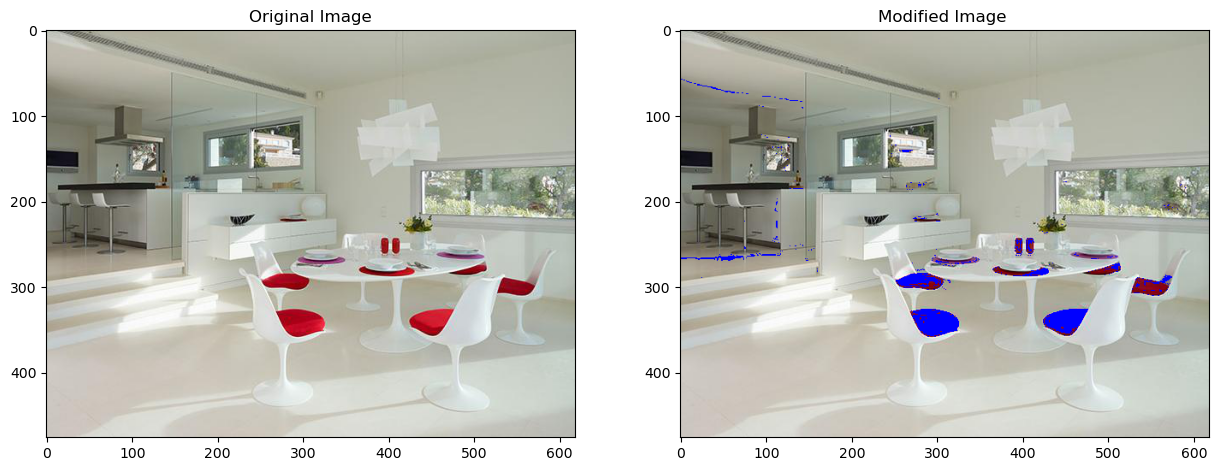

In [23]:
modified_image = np.copy(image)


red_threshold = 150  
is_red = (image[:, :, 0] > red_threshold) & (image[:, :, 1] < red_threshold) & (image[:, :, 2] < red_threshold)

modified_image[is_red] = [0, 0, 255]

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(modified_image)
axs[1].set_title('Modified Image ')

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

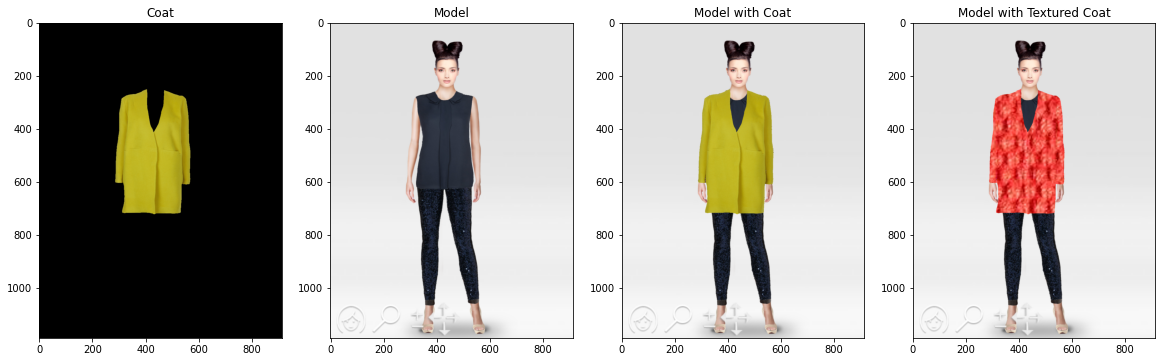

In [25]:
from skimage import   color


model_path = 'images/model.png'
coat_path = 'images/coat.png'
texture_path = 'images/texture.png'

model = io.imread(model_path)
coat = io.imread(coat_path)
texture = io.imread(texture_path)

In [27]:
def ensure_rgb(image):
    if image.shape[2] == 4:
        return color.rgba2rgb(image)
    elif image.shape[2] == 3:
        return image
    else:
        raise ValueError("Unsupported number of channels in image.")

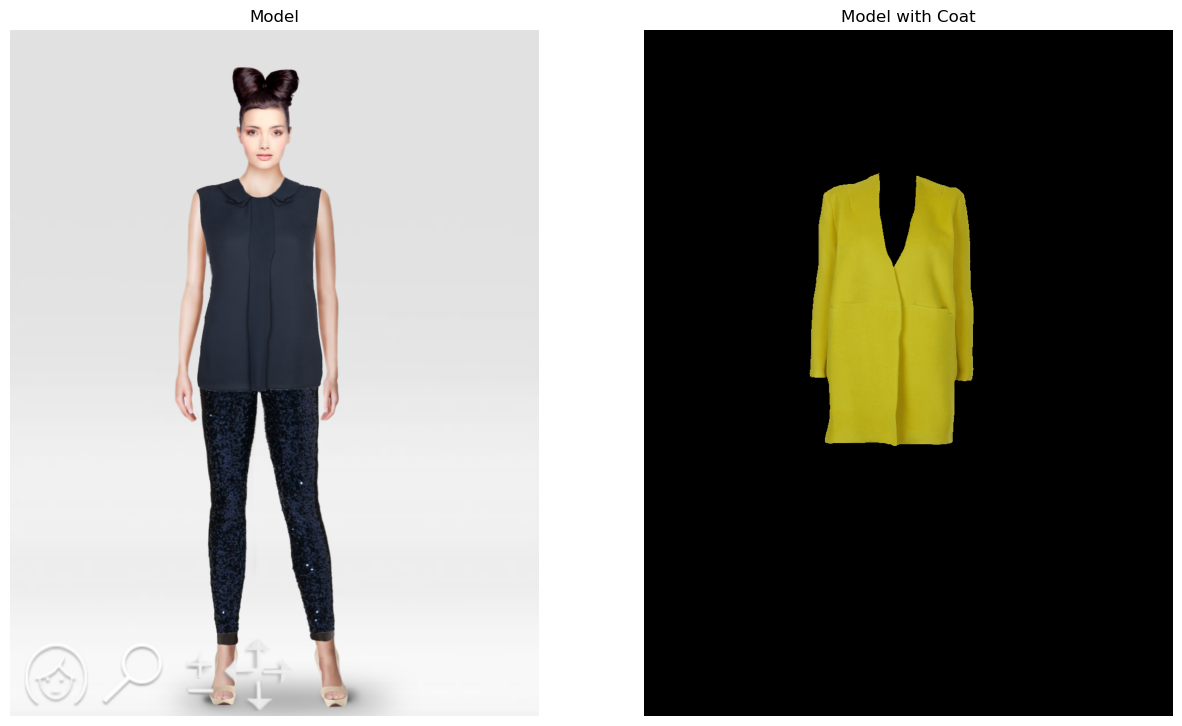

In [32]:
from skimage import  transform
# Function to ensure image is RGBA
def ensure_rgba(image):
    if image.shape[2] == 4:
        return image
    elif image.shape[2] == 3:
        return np.dstack((image, np.ones((image.shape[0], image.shape[1], 1), dtype=image.dtype) * 255))
    else:
        raise ValueError("Unsupported number of channels in image.")

# Load the images
model_path = 'images/model.png'
coat_path = 'images/coat.png'

model = ensure_rgba(io.imread(model_path))
coat = ensure_rgba(io.imread(coat_path))

# Convert the coat image to grayscale to create a mask
coat_gray = color.rgb2gray(coat[:, :, :3])
mask = coat_gray < 0.95  # Create a mask where the coat is located

# Apply the mask to the coat image to make the outer area transparent
coat_rgba = np.copy(coat)
coat_rgba[~mask] = [0, 0, 0, 0]  # Set the non-coat areas to be fully transparent

# Overlay the transparent coat onto the model image
result = np.copy(model)
alpha_coat = coat_rgba[:, :, 3] / 255.0
for c in range(3):  # For RGB channels
    result[:, :, c] = (result[:, :, c] * (1 - alpha_coat) + coat_rgba[:, :, c] * alpha_coat).astype(np.uint8)

# Visualize the images
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Plot the model image
axs[0].imshow(model)
axs[0].set_title('Model')
axs[0].axis('off')

# Plot the final image
axs[1].imshow(result)
axs[1].set_title('Model with Coat')
axs[1].axis('off')

plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




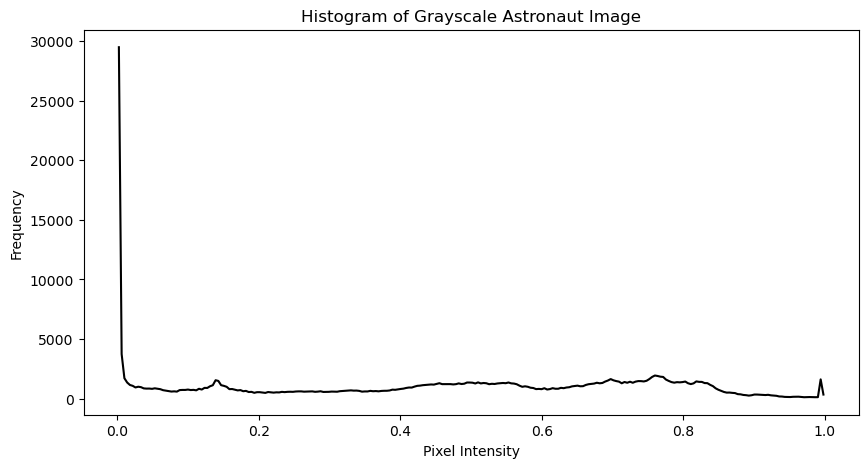

In [34]:

from skimage import exposure

# Load the 'astronaut' image
astronaut_image = data.astronaut()

# Convert the image to grayscale
gray_astronaut_image = color.rgb2gray(astronaut_image)

# Compute the histogram of the grayscale image
hist, bins = exposure.histogram(gray_astronaut_image)

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(bins, hist, color='black')
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

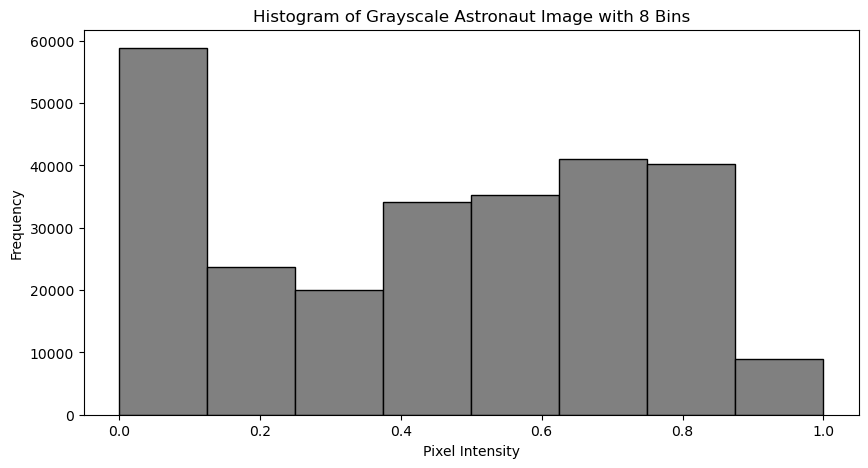

In [35]:
gray_astronaut_image = color.rgb2gray(astronaut_image)

# Compute the histogram of the grayscale image with 8 bins
hist, bins = np.histogram(gray_astronaut_image, bins=8, range=(0, 1))

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black', align='edge', color='gray')
plt.title('Histogram of Grayscale Astronaut Image with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


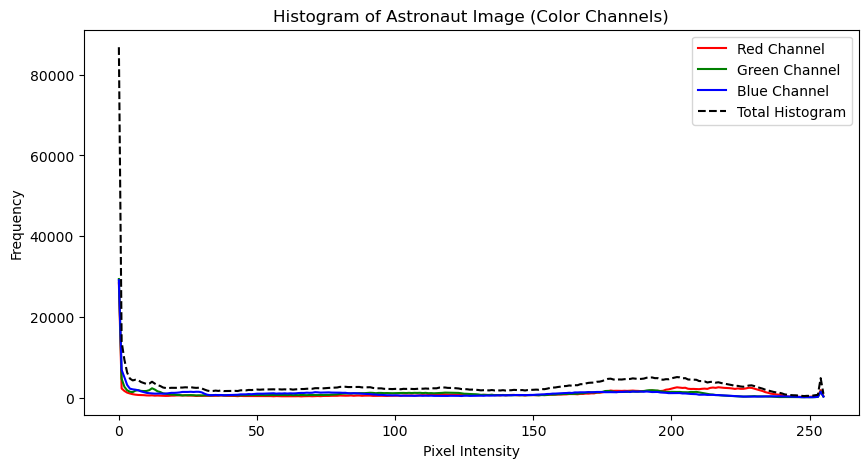

In [36]:
# Compute the histogram for each color channel
hist_red, bins_red = exposure.histogram(astronaut_image[:, :, 0])
hist_green, bins_green = exposure.histogram(astronaut_image[:, :, 1])
hist_blue, bins_blue = exposure.histogram(astronaut_image[:, :, 2])

# Compute the total histogram by summing the histograms of all channels
hist_total = hist_red + hist_green + hist_blue

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.plot(bins_red, hist_red, color='red', label='Red Channel')
plt.plot(bins_green, hist_green, color='green', label='Green Channel')
plt.plot(bins_blue, hist_blue, color='blue', label='Blue Channel')
plt.plot(bins_red, hist_total, color='black', linestyle='--', label='Total Histogram')
plt.title('Histogram of Astronaut Image (Color Channels)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



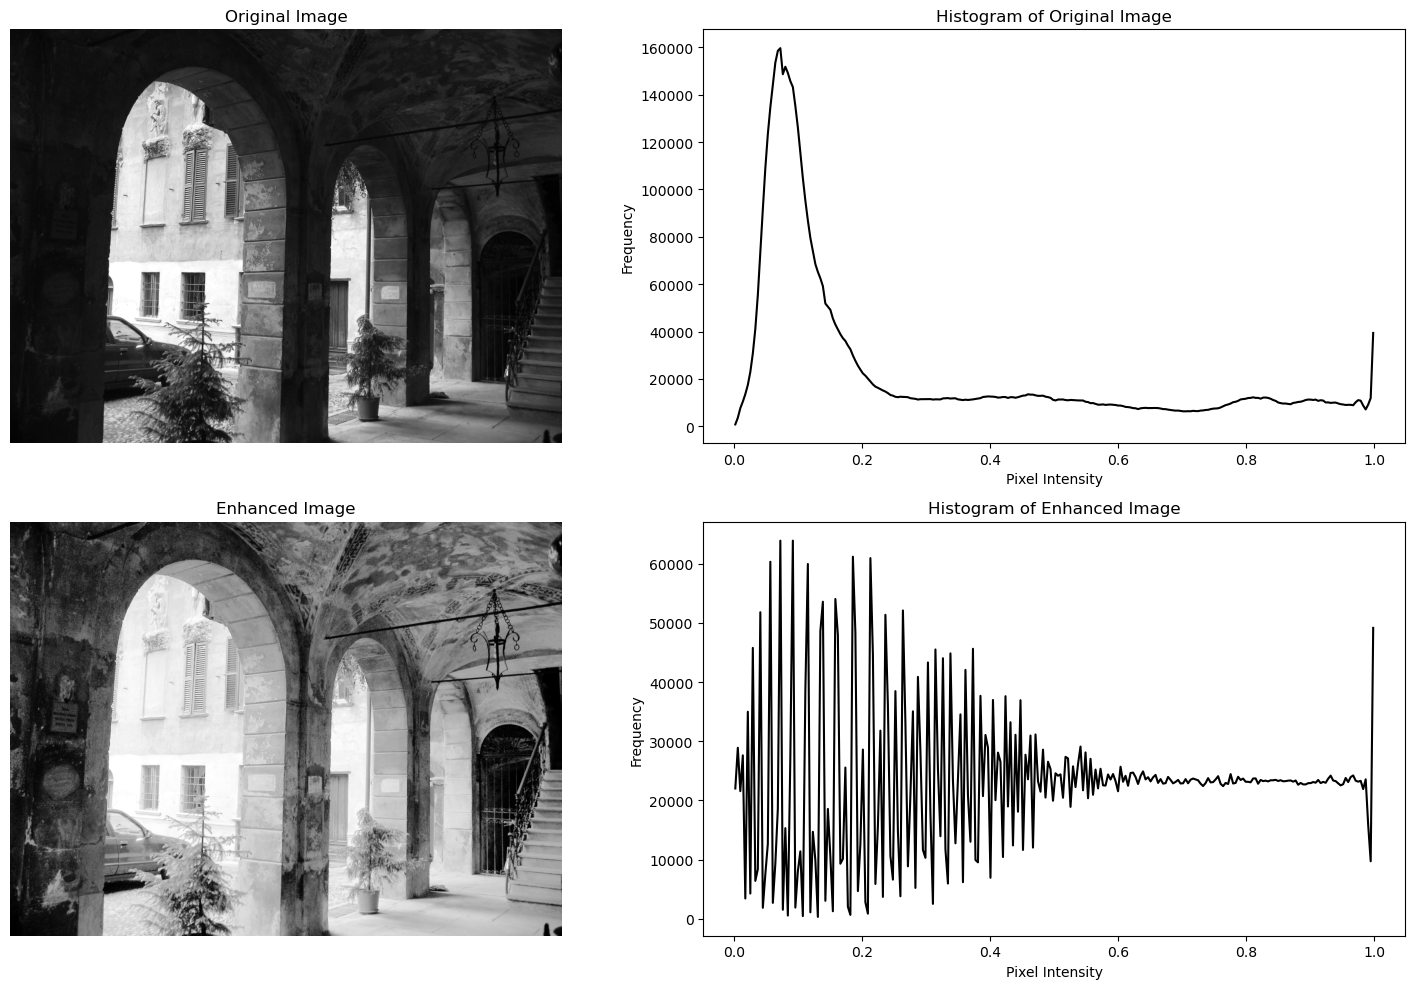

In [37]:
image_path = 'images/aquatermi_lowcontrast.jpg'
image = io.imread(image_path)

# Convert the image to grayscale if it is not already
if len(image.shape) == 3 and image.shape[2] == 3:
    gray_image = color.rgb2gray(image)
else:
    gray_image = image

# Compute the histogram of the original image
hist_orig, bins_orig = exposure.histogram(gray_image)

# Perform histogram equalization
equalized_image = exposure.equalize_hist(gray_image)

# Compute the histogram of the equalized image
hist_eq, bins_eq = exposure.histogram(equalized_image)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original image
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Histogram of original image
axs[0, 1].plot(bins_orig, hist_orig, color='black')
axs[0, 1].set_title('Histogram of Original Image')
axs[0, 1].set_xlabel('Pixel Intensity')
axs[0, 1].set_ylabel('Frequency')

# Enhanced image
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title('Enhanced Image')
axs[1, 0].axis('off')

# Histogram of enhanced image
axs[1, 1].plot(bins_eq, hist_eq, color='black')
axs[1, 1].set_title('Histogram of Enhanced Image')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [ ]:
# solution



In [ ]:
# solution



In [ ]:
# solution



In [ ]:
# solution




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



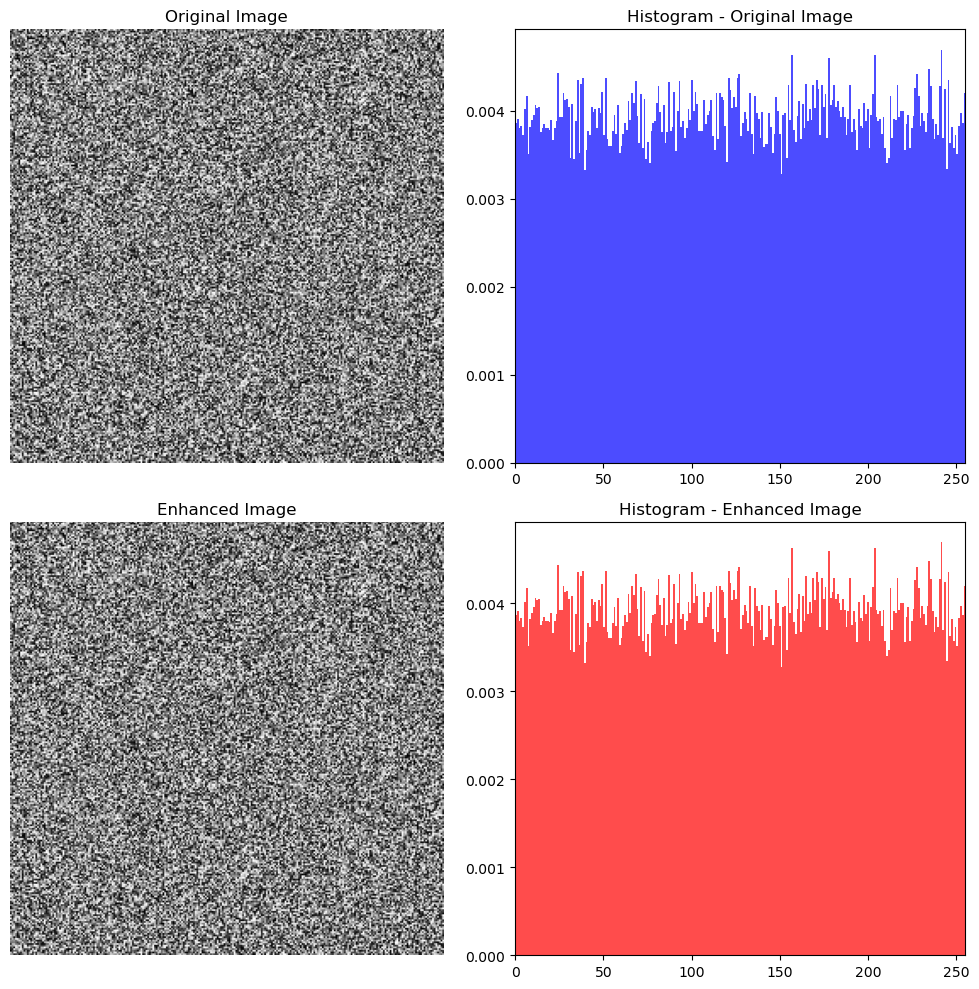

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def linear_contrast_stretch(image, bin_count=256):
    # Flatten the image to a 1D array
    pixels = image.flatten()
    
    # Compute the minimum and maximum pixel values
    min_val = np.min(pixels)
    max_val = np.max(pixels)
    
    # Perform linear contrast stretch
    stretched_image = ((image - min_val) / (max_val - min_val)) * (bin_count - 1)
    stretched_image = stretched_image.astype(np.uint8)
    
    return stretched_image

def plot_image_and_histogram(original_image, enhanced_image):
    # Create a figure with 2x2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    
    # Plot original image
    axs[0, 0].imshow(original_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')
    
    # Plot histogram of original image
    axs[0, 1].hist(original_image.flatten(), bins=256, range=(0, 255), density=True, color='b', alpha=0.7)
    axs[0, 1].set_title('Histogram - Original Image')
    axs[0, 1].set_xlim([0, 255])
    
    # Plot enhanced image
    axs[1, 0].imshow(enhanced_image, cmap='gray')
    axs[1, 0].set_title('Enhanced Image')
    axs[1, 0].axis('off')
    
    # Plot histogram of enhanced image
    axs[1, 1].hist(enhanced_image.flatten(), bins=256, range=(0, 255), density=True, color='r', alpha=0.7)
    axs[1, 1].set_title('Histogram - Enhanced Image')
    axs[1, 1].set_xlim([0, 255])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have your grayscale image array stored in `original_image`

# Generate a sample grayscale image (replace with your own image loading code)
np.random.seed(0)
original_image = np.random.randint(0, 256, size=(256, 256)).astype(np.uint8)

# Perform linear contrast stretch
enhanced_image = linear_contrast_stretch(original_image)

# Plot original and enhanced images along with histograms
plot_image_and_histogram(original_image, enhanced_image)



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




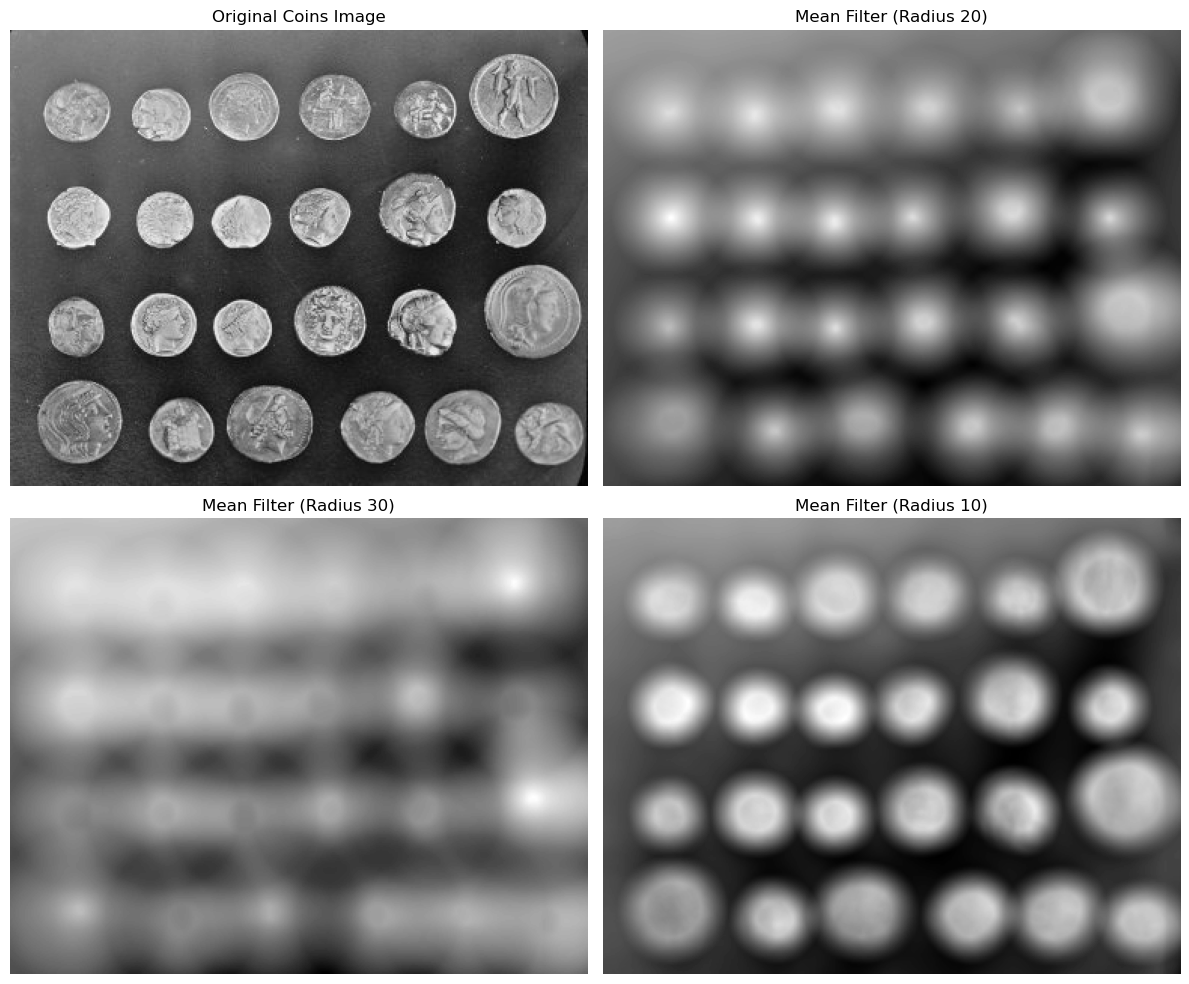

In [39]:
import matplotlib.pyplot as plt
from skimage import data, filters, morphology, util
from skimage.morphology import disk
from skimage.filters.rank import mean

# Step 1: Load the coins image from skimage.data
coins_image = data.coins()

# Step 2: Define disk structuring elements of different radii
selem_radius = [20, 30, 10]

# Step 3: Apply mean filter with different structuring elements
smoothed_images = []
for radius in selem_radius:
    selem = disk(radius)
    smoothed = mean(coins_image, selem)
    smoothed_images.append(smoothed)

# Step 4: Visualize original and smoothed images
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(coins_image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(smoothed_images[0], cmap='gray')
plt.title(f'Mean Filter (Radius {selem_radius[0]})')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_images[1], cmap='gray')
plt.title(f'Mean Filter (Radius {selem_radius[1]})')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(smoothed_images[2], cmap='gray')
plt.title(f'Mean Filter (Radius {selem_radius[2]})')
plt.axis('off')

plt.tight_layout()
plt.show()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

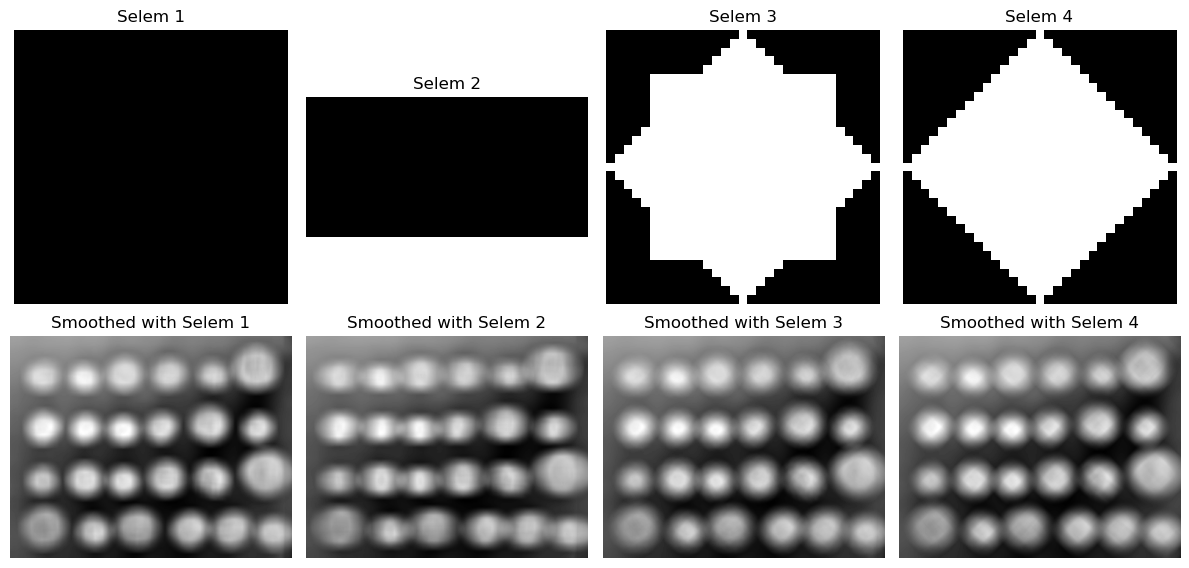

In [40]:
# import matplotlib.pyplot as plt
from skimage import data, filters, morphology
from skimage.filters.rank import mean
from skimage.morphology import square, rectangle, star, diamond

# Step 1: Define different structuring elements (selem)
selems = [
    square(20),
    rectangle(15, 30),
    star(10),
    diamond(15)
]

# Step 2: Load the coins image from skimage.data
coins_image = data.coins()

# Step 3: Apply mean filter with each structuring element
smoothed_images = []
for selem in selems:
    smoothed = mean(coins_image, selem)
    smoothed_images.append(smoothed)

# Step 4: Visualize structuring elements and smoothed images
num_selems = len(selems)
plt.figure(figsize=(12, 6))

# Plotting structuring elements
for i in range(num_selems):
    plt.subplot(2, num_selems, i + 1)
    plt.imshow(selems[i], cmap='gray')
    plt.title(f'Selem {i+1}')
    plt.axis('off')

# Plotting smoothed images
for i in range(num_selems):
    plt.subplot(2, num_selems, num_selems + i + 1)
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.title(f'Smoothed with Selem {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()




*   How does changing the radius of disk affect the smoothing functionality?

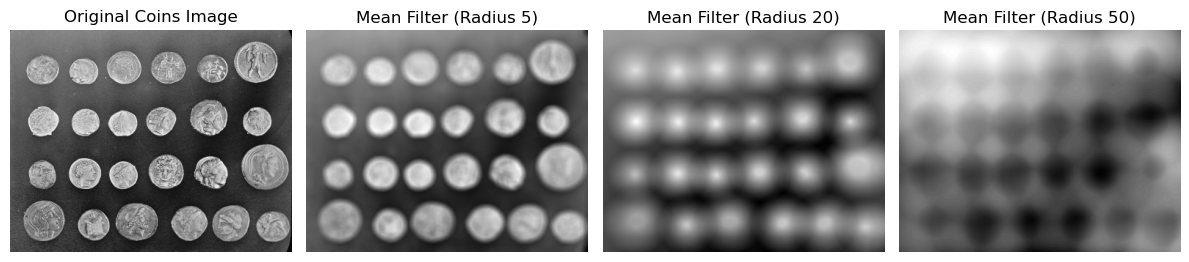

In [41]:
import matplotlib.pyplot as plt
from skimage import data, filters, morphology
from skimage.filters.rank import mean
from skimage.morphology import disk

# Load the coins image from skimage.data
coins_image = data.coins()

# Define different radii for the disk structuring element
radii = [5, 20, 50]

# Apply mean filter with each radius
smoothed_images = []
for radius in radii:
    selem = disk(radius)
    smoothed = mean(coins_image, selem)
    smoothed_images.append(smoothed)

# Visualize original and smoothed images
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(coins_image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

for i, radius in enumerate(radii):
    plt.subplot(1, 4, i + 2)
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.title(f'Mean Filter (Radius {radius})')
    plt.axis('off')

plt.tight_layout()
plt.show()



*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean Filter: Use when uniform noise reduction is sufficient or when simplicity and computational efficiency are important. It's effective for basic blurring and noise reduction tasks.

Gaussian Filter: Use when preserving edges and details is crucial or when a more sophisticated smoothing effect is desired. It's suitable for applications where a natural appearance of the image needs to be maintained.
...